# Pandas

In [1]:
import pandas as pd
import numpy as np

## 1 生成对象

In [2]:
# 用列表生成series对象
s = pd.Series([1,3,5,np.nan,7])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    7.0
dtype: float64

In [3]:
# 矩阵 - DataFrame
df2 = pd.DataFrame({
    'A':[1],
    'B':[pd.Timestamp('20240101')],
    'C':['xxx']
})
df2

,A,B,C
0,1,2024-01-01,xxx


In [4]:
# 用含日期的索引生成矩阵
d = pd.date_range('20240101', periods=6)
d

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
df = pd.DataFrame(np.random.randn(6,4), index=d, columns=list('ABCD')) 
# np.random.randn(6,4) 用于生成6行4列的二维数组，每个数字iid~N(0,1)
df

,A,B,C,D
2024-01-01,-1.225041,1.470983,0.600280,-0.562757
2024-01-02,0.671088,0.305613,-0.568779,0.697972
2024-01-03,2.427917,-0.517427,0.852577,-0.504727
2024-01-04,1.621503,-0.133310,-0.883245,0.257557
2024-01-05,0.196969,-0.446818,-0.497590,-1.384915
2024-01-06,-1.767401,0.938807,-1.109558,-0.513002


## 2 查看数据

In [6]:
df2.dtypes

A             int64
B    datetime64[ns]
C            object
dtype: object

In [7]:
df.head() # 前5行

,A,B,C,D
2024-01-01,-1.225041,1.470983,0.600280,-0.562757
2024-01-02,0.671088,0.305613,-0.568779,0.697972
2024-01-03,2.427917,-0.517427,0.852577,-0.504727
2024-01-04,1.621503,-0.133310,-0.883245,0.257557
2024-01-05,0.196969,-0.446818,-0.497590,-1.384915


In [8]:
df.tail() # 后5行

,A,B,C,D
2024-01-02,0.671088,0.305613,-0.568779,0.697972
2024-01-03,2.427917,-0.517427,0.852577,-0.504727
2024-01-04,1.621503,-0.133310,-0.883245,0.257557
2024-01-05,0.196969,-0.446818,-0.497590,-1.384915
2024-01-06,-1.767401,0.938807,-1.109558,-0.513002


In [9]:
df.index # 查看索引 （最左边一列）

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns 

Index(['A', 'B', 'C', 'D'], dtype='object')

In [11]:
df.describe() # 数据描述性统计

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.320839,0.269642,-0.267719,-0.334979
std,1.613692,0.798431,0.804926,0.725650
min,-1.767401,-0.517427,-1.109558,-1.384915
25%,-0.869538,-0.368441,-0.804628,-0.550318
50%,0.434029,0.086152,-0.533184,-0.508864
75%,1.383900,0.780509,0.325813,0.066986
max,2.427917,1.470983,0.852577,0.697972


## 3 排序

In [12]:
# 按列降序
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2024-01-01,-0.562757,0.600280,1.470983,-1.225041
2024-01-02,0.697972,-0.568779,0.305613,0.671088
2024-01-03,-0.504727,0.852577,-0.517427,2.427917
2024-01-04,0.257557,-0.883245,-0.133310,1.621503
2024-01-05,-1.384915,-0.497590,-0.446818,0.196969
2024-01-06,-0.513002,-1.109558,0.938807,-1.767401


In [13]:
# 按值排序
df.sort_values(by='B')

,A,B,C,D
2024-01-03,2.427917,-0.517427,0.852577,-0.504727
2024-01-05,0.196969,-0.446818,-0.497590,-1.384915
2024-01-04,1.621503,-0.133310,-0.883245,0.257557
2024-01-02,0.671088,0.305613,-0.568779,0.697972
2024-01-06,-1.767401,0.938807,-1.109558,-0.513002
2024-01-01,-1.225041,1.470983,0.600280,-0.562757


## 4 选择数据

In [14]:
df['A']

2024-01-01   -1.225041
2024-01-02    0.671088
2024-01-03    2.427917
2024-01-04    1.621503
2024-01-05    0.196969
2024-01-06   -1.767401
Freq: D, Name: A, dtype: float64

In [15]:
df[1:3]

,A,B,C,D
2024-01-02,0.671088,0.305613,-0.568779,0.697972
2024-01-03,2.427917,-0.517427,0.852577,-0.504727


In [16]:
df['20240101':'20240104']

,A,B,C,D
2024-01-01,-1.225041,1.470983,0.600280,-0.562757
2024-01-02,0.671088,0.305613,-0.568779,0.697972
2024-01-03,2.427917,-0.517427,0.852577,-0.504727
2024-01-04,1.621503,-0.133310,-0.883245,0.257557


### 4.1 按标签选择

In [17]:
df.loc['20240103']

A    2.427917
B   -0.517427
C    0.852577
D   -0.504727
Name: 2024-01-03 00:00:00, dtype: float64

In [18]:
df.loc[d[2]]

A    2.427917
B   -0.517427
C    0.852577
D   -0.504727
Name: 2024-01-03 00:00:00, dtype: float64

In [19]:
df.loc[:,['A','B']]

,A,B
2024-01-01,-1.225041,1.470983
2024-01-02,0.671088,0.305613
2024-01-03,2.427917,-0.517427
2024-01-04,1.621503,-0.133310
2024-01-05,0.196969,-0.446818
2024-01-06,-1.767401,0.938807


In [20]:
df.loc[d[0]:d[2],['A','B']]

,A,B
2024-01-01,-1.225041,1.470983
2024-01-02,0.671088,0.305613
2024-01-03,2.427917,-0.517427


In [21]:
df.at['20240101','A']

-1.2250407660299223

### 4.2 按位置选择

In [22]:
df.iloc[3]

A    1.621503
B   -0.133310
C   -0.883245
D    0.257557
Name: 2024-01-04 00:00:00, dtype: float64

In [23]:
df.iloc[3:5,0:2]

,A,B
2024-01-04,1.621503,-0.133310
2024-01-05,0.196969,-0.446818


In [24]:
df.iloc[0,0]

-1.2250407660299223

### 4.3 筛选

In [25]:
df[df['B']>0]

,A,B,C,D
2024-01-01,-1.225041,1.470983,0.600280,-0.562757
2024-01-02,0.671088,0.305613,-0.568779,0.697972
2024-01-06,-1.767401,0.938807,-1.109558,-0.513002


In [26]:
df[df>0]

,A,B,C,D
2024-01-01,NaN,1.470983,0.600280,NaN
2024-01-02,0.671088,0.305613,NaN,0.697972
2024-01-03,2.427917,NaN,0.852577,NaN
2024-01-04,1.621503,NaN,NaN,0.257557
2024-01-05,0.196969,NaN,NaN,NaN
2024-01-06,NaN,0.938807,NaN,NaN


In [27]:
df_copy = df.copy()
df_copy['E'] = ['one','one','two','two','three','three']
df_copy

,A,B,C,D,E
2024-01-01,-1.225041,1.470983,0.600280,-0.562757,one
2024-01-02,0.671088,0.305613,-0.568779,0.697972,one
2024-01-03,2.427917,-0.517427,0.852577,-0.504727,two
2024-01-04,1.621503,-0.133310,-0.883245,0.257557,two
2024-01-05,0.196969,-0.446818,-0.497590,-1.384915,three
2024-01-06,-1.767401,0.938807,-1.109558,-0.513002,three


In [28]:
df_copy[df_copy['E'].isin(['one'])]

,A,B,C,D,E
2024-01-01,-1.225041,1.470983,0.600280,-0.562757,one
2024-01-02,0.671088,0.305613,-0.568779,0.697972,one


## 5 赋值

In [29]:
# 用索引自动对齐新增列的数据
s1 = pd.Series([1,2,3,4,5,6],index=d)
s1

2024-01-01    1
2024-01-02    2
2024-01-03    3
2024-01-04    4
2024-01-05    5
2024-01-06    6
Freq: D, dtype: int64

In [30]:
df['F'] = s1
df

,A,B,C,D,F
2024-01-01,-1.225041,1.470983,0.600280,-0.562757,1
2024-01-02,0.671088,0.305613,-0.568779,0.697972,2
2024-01-03,2.427917,-0.517427,0.852577,-0.504727,3
2024-01-04,1.621503,-0.133310,-0.883245,0.257557,4
2024-01-05,0.196969,-0.446818,-0.497590,-1.384915,5
2024-01-06,-1.767401,0.938807,-1.109558,-0.513002,6


In [31]:
df.at['20240101', "A"] = 0
df

,A,B,C,D,F
2024-01-01,0.000000,1.470983,0.600280,-0.562757,1
2024-01-02,0.671088,0.305613,-0.568779,0.697972,2
2024-01-03,2.427917,-0.517427,0.852577,-0.504727,3
2024-01-04,1.621503,-0.133310,-0.883245,0.257557,4
2024-01-05,0.196969,-0.446818,-0.497590,-1.384915,5
2024-01-06,-1.767401,0.938807,-1.109558,-0.513002,6


In [32]:
df.iat[0,0]=1
df

,A,B,C,D,F
2024-01-01,1.000000,1.470983,0.600280,-0.562757,1
2024-01-02,0.671088,0.305613,-0.568779,0.697972,2
2024-01-03,2.427917,-0.517427,0.852577,-0.504727,3
2024-01-04,1.621503,-0.133310,-0.883245,0.257557,4
2024-01-05,0.196969,-0.446818,-0.497590,-1.384915,5
2024-01-06,-1.767401,0.938807,-1.109558,-0.513002,6


In [33]:
# 用numpy数组赋值
df.loc[:,'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2024-01-01,1.000000,1.470983,0.600280,5.0,1
2024-01-02,0.671088,0.305613,-0.568779,5.0,2
2024-01-03,2.427917,-0.517427,0.852577,5.0,3
2024-01-04,1.621503,-0.133310,-0.883245,5.0,4
2024-01-05,0.196969,-0.446818,-0.497590,5.0,5
2024-01-06,-1.767401,0.938807,-1.109558,5.0,6


In [34]:
# 条件赋值
df_copy = df.copy()
df_copy[df_copy < 0] = 0
df_copy

,A,B,C,D,F
2024-01-01,1.000000,1.470983,0.600280,5.0,1
2024-01-02,0.671088,0.305613,0.000000,5.0,2
2024-01-03,2.427917,0.000000,0.852577,5.0,3
2024-01-04,1.621503,0.000000,0.000000,5.0,4
2024-01-05,0.196969,0.000000,0.000000,5.0,5
2024-01-06,0.000000,0.938807,0.000000,5.0,6


## 6 空值

In [35]:
# 重新构建一个矩阵，并只对前几行赋值，人为制造NaN
df1 = df.reindex(index=d[0:4], columns=list(df.columns) + ['E'])
df1.loc[d[0]:d[1],'E'] = 1
df1

,A,B,C,D,F,E
2024-01-01,1.000000,1.470983,0.600280,5.0,1,1.0
2024-01-02,0.671088,0.305613,-0.568779,5.0,2,1.0
2024-01-03,2.427917,-0.517427,0.852577,5.0,3,NaN
2024-01-04,1.621503,-0.133310,-0.883245,5.0,4,NaN


In [36]:
# 去除有空值的行
df1.dropna()

,A,B,C,D,F,E
2024-01-01,1.000000,1.470983,0.600280,5.0,1,1.0
2024-01-02,0.671088,0.305613,-0.568779,5.0,2,1.0


In [37]:
# 填充空值
df1.fillna(value=5)

,A,B,C,D,F,E
2024-01-01,1.000000,1.470983,0.600280,5.0,1,1.0
2024-01-02,0.671088,0.305613,-0.568779,5.0,2,1.0
2024-01-03,2.427917,-0.517427,0.852577,5.0,3,5.0
2024-01-04,1.621503,-0.133310,-0.883245,5.0,4,5.0


In [38]:
pd.isna(df1)

,A,B,C,D,F,E
2024-01-01,False,False,False,False,False,False
2024-01-02,False,False,False,False,False,False
2024-01-03,False,False,False,False,False,True
2024-01-04,False,False,False,False,False,True


## 7 运算

### 7.1 算术运算

In [39]:
df1 = pd.DataFrame(np.random.randn(2,5))
df1

,0,1,2,3,4
0,2.516957,-0.345919,-0.291208,-0.055830,-0.278918
1,-0.056978,-0.023858,0.812339,0.443077,-0.618826


In [40]:
df2 = pd.DataFrame(np.random.randn(3,4))
df2

,0,1,2,3
0,0.452216,1.458180,0.001986,1.475395
1,0.444671,1.153279,0.896251,0.742397
2,0.158949,1.418799,-1.201274,0.242558


In [41]:
df1 + df2 # NaN和任何数运算结果都是NaN，类比sql中的None，是一个未知值

,0,1,2,3,4
0,2.969173,1.112261,-0.289223,1.419565,NaN
1,0.387693,1.129421,1.708591,1.185474,NaN
2,NaN,NaN,NaN,NaN,NaN


In [42]:
df1 * df2

,0,1,2,3,4
0,1.138208,-0.504413,-0.000578,-0.082372,NaN
1,-0.025337,-0.027515,0.728060,0.328939,NaN
2,NaN,NaN,NaN,NaN,NaN


### 7.2 比较运算

In [43]:
df1.eq(df2) # NaN和任何数比较都是False

,0,1,2,3,4
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False


In [44]:
df1.lt(df2) # less than

,0,1,2,3,4
0,False,True,True,True,False
1,True,True,True,True,False
2,False,False,False,False,False


### 7.3 统计

In [45]:
df1

,0,1,2,3,4
0,2.516957,-0.345919,-0.291208,-0.055830,-0.278918
1,-0.056978,-0.023858,0.812339,0.443077,-0.618826


In [46]:
df1.mean() # 均值

0    1.229990
1   -0.184889
2    0.260565
3    0.193623
4   -0.448872
dtype: float64

In [47]:
df1.cumsum() # 按列累加

,0,1,2,3,4
0,2.516957,-0.345919,-0.291208,-0.055830,-0.278918
1,2.459979,-0.369778,0.521131,0.387247,-0.897744


### 7.4 合并

In [48]:
pd.concat([df1,df2]) # 简单拼接

,0,1,2,3,4
0,2.516957,-0.345919,-0.291208,-0.055830,-0.278918
1,-0.056978,-0.023858,0.812339,0.443077,-0.618826
0,0.452216,1.458180,0.001986,1.475395,NaN
1,0.444671,1.153279,0.896251,0.742397,NaN
2,0.158949,1.418799,-1.201274,0.242558,NaN


### 7.5 连接 —— 和sql表的join一样

In [49]:
left = pd.DataFrame({'key':['a','b','c'], 'l_val':[1,2,3]})
left

,key,l_val
0,a,1
1,b,2
2,c,3


In [50]:
right = pd.DataFrame({'key':['a','b','c'], 'r_val':[4,5,6]})
right

,key,r_val
0,a,4
1,b,5
2,c,6


In [51]:
pd.merge(left, right, on='key')

,key,l_val,r_val
0,a,1,4
1,b,2,5
2,c,3,6


### 7.6 分组 —— 类比sql 的group by

In [52]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                        'foo', 'bar', 'foo', 'foo'],
                'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                  'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.051566,1.387067
1,bar,one,-2.312728,1.436101
2,foo,two,-1.450617,0.109565
3,bar,three,-1.316907,-1.053826
4,foo,two,2.171497,-0.863542
5,bar,two,1.793934,-0.668714
6,foo,one,0.149464,0.686753
7,foo,three,0.351837,-1.401087


In [53]:
df.groupby('A').sum()

,B,C,D
A,,,
bar,onethreetwo,-1.835700,-0.286439
foo,onetwotwoonethree,1.273745,-0.081244


In [54]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -2.312728  1.436101
    three -1.316907 -1.053826
    two    1.793934 -0.668714
foo one    0.201029  2.073820
    three  0.351837 -1.401087
    two    0.720879 -0.753977

## 8 数据透视表

In [55]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,0.443947,-2.260975
1,one,B,foo,-0.792226,1.059163
2,two,C,foo,1.703310,0.305665
3,three,A,bar,0.249915,0.999627
4,one,B,bar,0.244689,2.284297
5,one,C,bar,-1.749002,1.617676
6,two,A,foo,1.047103,0.052720
7,three,B,foo,0.604957,-0.364218
8,one,C,foo,-0.235252,0.254277
9,one,A,bar,-0.644742,-1.368122


In [56]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.644742  0.443947
      B  0.244689 -0.792226
      C -1.749002 -0.235252
three A  0.249915       NaN
      B       NaN  0.604957
      C -1.553595       NaN
two   A       NaN  1.047103
      B -0.554181       NaN
      C       NaN  1.703310

## 9 时间序列

### 9.1 时间序列单位转换

In [59]:
# 将秒级的数据转换为5分钟为频率的数据
idx = pd.date_range('1/1/2024', periods=100, freq='S') # 100个秒级时间索引
idx

DatetimeIndex(['2024-01-01 00:00:00', '2024-01-01 00:00:01',
               '2024-01-01 00:00:02', '2024-01-01 00:00:03',
               '2024-01-01 00:00:04', '2024-01-01 00:00:05',
               '2024-01-01 00:00:06', '2024-01-01 00:00:07',
               '2024-01-01 00:00:08', '2024-01-01 00:00:09',
               '2024-01-01 00:00:10', '2024-01-01 00:00:11',
               '2024-01-01 00:00:12', '2024-01-01 00:00:13',
               '2024-01-01 00:00:14', '2024-01-01 00:00:15',
               '2024-01-01 00:00:16', '2024-01-01 00:00:17',
               '2024-01-01 00:00:18', '2024-01-01 00:00:19',
               '2024-01-01 00:00:20', '2024-01-01 00:00:21',
               '2024-01-01 00:00:22', '2024-01-01 00:00:23',
               '2024-01-01 00:00:24', '2024-01-01 00:00:25',
               '2024-01-01 00:00:26', '2024-01-01 00:00:27',
               '2024-01-01 00:00:28', '2024-01-01 00:00:29',
               '2024-01-01 00:00:30', '2024-01-01 00:00:31',
               '2024-01-

In [60]:
data = pd.Series(np.random.randint(0,500,len(idx)),index=idx)
data

2024-01-01 00:00:00    302
2024-01-01 00:00:01    381
2024-01-01 00:00:02    466
2024-01-01 00:00:03    203
2024-01-01 00:00:04    333
                      ... 
2024-01-01 00:01:35    471
2024-01-01 00:01:36    255
2024-01-01 00:01:37    289
2024-01-01 00:01:38    401
2024-01-01 00:01:39    274
Freq: S, Length: 100, dtype: int32

In [61]:
data.resample('5Min').sum() # 以5分钟为单位聚合数据

2024-01-01    26808
Freq: 5T, dtype: int32

### 9.2 时区

In [63]:
# 时区表示
idx = pd.date_range('1/1/2024',periods=5,freq='D')
idx

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05'],
              dtype='datetime64[ns]', freq='D')

In [64]:
data = pd.Series(np.random.randn(len(idx)),index=idx)
data

2024-01-01    1.197109
2024-01-02    0.686406
2024-01-03    0.973741
2024-01-04   -0.309155
2024-01-05    0.525549
Freq: D, dtype: float64

In [65]:
# 变为UTC时间
data_utc = data.tz_localize('UTC')
data_utc

2024-01-01 00:00:00+00:00    1.197109
2024-01-02 00:00:00+00:00    0.686406
2024-01-03 00:00:00+00:00    0.973741
2024-01-04 00:00:00+00:00   -0.309155
2024-01-05 00:00:00+00:00    0.525549
Freq: D, dtype: float64

In [66]:
# 变为美东时间
data_utc.tz_convert('US/Eastern')

2023-12-31 19:00:00-05:00    1.197109
2024-01-01 19:00:00-05:00    0.686406
2024-01-02 19:00:00-05:00    0.973741
2024-01-03 19:00:00-05:00   -0.309155
2024-01-04 19:00:00-05:00    0.525549
Freq: D, dtype: float64

### 9.3 转换时间段

In [68]:
idx = pd.date_range('20240101', periods=5, freq='M')
data = pd.Series(np.random.randn(len(idx)),index=idx)
data

2024-01-31   -0.194146
2024-02-29   -1.668632
2024-03-31   -1.194073
2024-04-30   -0.755781
2024-05-31   -0.183900
Freq: M, dtype: float64

In [69]:
data = data.to_period()
data

2024-01   -0.194146
2024-02   -1.668632
2024-03   -1.194073
2024-04   -0.755781
2024-05   -0.183900
Freq: M, dtype: float64

In [70]:
data.to_timestamp()

2024-01-01   -0.194146
2024-02-01   -1.668632
2024-03-01   -1.194073
2024-04-01   -0.755781
2024-05-01   -0.183900
Freq: MS, dtype: float64

## 10 可视化

In [71]:
# 需要用到 matplotlib 
import matplotlib.pyplot as plt

<Axes: >

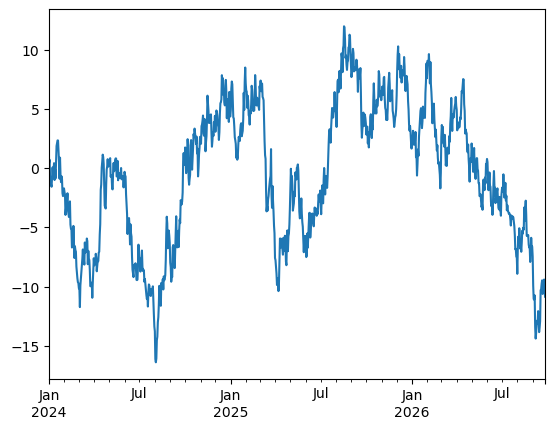

In [75]:
data = pd.Series(np.random.randn(1000),
                 index=pd.date_range('20240101',periods=1000))
data = data.cumsum() # 生成1000个正太分布的数的累加
data.plot()

<Figure size 640x480 with 0 Axes>

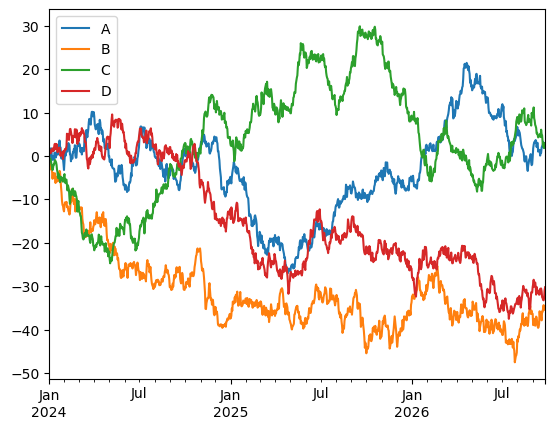

In [76]:
data1 = pd.DataFrame(np.random.randn(1000,4), # 生成 1000 x 4 个 正太分布数
                    index=data.index, columns=['A','B','C','D'])
data1 = data1.cumsum()
plt.figure()
data1.plot()
plt.legend(loc='best') # plt.legend() 添加图例，loc='best' 参数表示将图例放在图形中的最佳位置

## 11 输入输出

### 11.1 csv

In [77]:
data1.to_csv('./example.csv')

In [78]:
pd.read_csv('example.csv')

,Unnamed: 0,A,B,C,D
0,2024-01-01,-1.970676,-0.100969,-0.052271,1.708107
1,2024-01-02,-0.419079,-1.624856,-1.138790,0.825737
2,2024-01-03,-0.044975,-1.971936,-0.775095,0.881641
3,2024-01-04,0.749910,-2.465691,-0.625492,0.623207
4,2024-01-05,1.790832,-3.098003,-1.400552,1.020292
...,...,...,...,...,...
995,2026-09-22,3.299406,-35.021461,2.210224,-33.155288
996,2026-09-23,1.936655,-34.354485,3.024541,-33.236825
997,2026-09-24,2.815651,-35.462250,1.814939,-32.735658
998,2026-09-25,2.590459,-34.969643,2.251181,-30.900221


### 11.2 HDF5

In [79]:
# pip install tables

data1.to_hdf('./example.h5','data1')

In [80]:
pd.read_hdf('example.h5', 'data1')

,A,B,C,D
2024-01-01,-1.970676,-0.100969,-0.052271,1.708107
2024-01-02,-0.419079,-1.624856,-1.138790,0.825737
2024-01-03,-0.044975,-1.971936,-0.775095,0.881641
2024-01-04,0.749910,-2.465691,-0.625492,0.623207
2024-01-05,1.790832,-3.098003,-1.400552,1.020292
...,...,...,...,...
2026-09-22,3.299406,-35.021461,2.210224,-33.155288
2026-09-23,1.936655,-34.354485,3.024541,-33.236825
2026-09-24,2.815651,-35.462250,1.814939,-32.735658
2026-09-25,2.590459,-34.969643,2.251181,-30.900221


### 11.3 Excel

In [81]:
# pip install openpyxl
data1.to_excel('./example.xlsx',sheet_name='sheet1')

In [82]:
pd.read_excel('example.xlsx','sheet1',index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2024-01-01,-1.970676,-0.100969,-0.052271,1.708107
1,2024-01-02,-0.419079,-1.624856,-1.138790,0.825737
2,2024-01-03,-0.044975,-1.971936,-0.775095,0.881641
3,2024-01-04,0.749910,-2.465691,-0.625492,0.623207
4,2024-01-05,1.790832,-3.098003,-1.400552,1.020292
...,...,...,...,...,...
995,2026-09-22,3.299406,-35.021461,2.210224,-33.155288
996,2026-09-23,1.936655,-34.354485,3.024541,-33.236825
997,2026-09-24,2.815651,-35.462250,1.814939,-32.735658
998,2026-09-25,2.590459,-34.969643,2.251181,-30.900221
